# Project Title:

Customer Segmentation Analysis for an E-Commerce Company

# Project Description

The primary aim of this data analytics project is to perform customer segmentation analysis for an e-commerce company. By examining customer behavior, transaction patterns, and purchasing frequency, the project seeks to group customers into distinct and meaningful segments.

These segments will help the company to:

Develop targeted marketing strategies tailored to specific customer groups.

Enhance customer satisfaction and retention by personalizing offers and services.

Improve overall business strategy and decision-making through data-driven insights.

# Dataset Description

A dataset will be obtained containing information about customer demographics, transaction history, and behavioral attributes.
Typical fields may include:

Customer ID

Age / Gender / Location

Number of purchases

Total and average purchase value

Frequency of transactions

Product categories purchased

Recency (days since last purchase)

# Key Concepts and Challenges
a. Data Collection

Gathering data from reliable e-commerce sources or open datasets.

Ensuring data relevance to the project objectives.

b. Data Exploration and Cleaning

Understanding dataset structure and attributes.

Handling missing values, outliers, and inconsistencies.

Converting categorical data into numerical form (e.g., through encoding).

c. Descriptive Statistics

Computing key summary statistics such as:

Average purchase value

Purchase frequency

Customer lifetime value (CLV)

Recency of purchase

Understanding customer behavior trends from these metrics.

d. Customer Segmentation

Applying clustering algorithms such as:

K-Means Clustering

Hierarchical Clustering

DBSCAN (if applicable)

Choosing the optimal number of clusters using methods such as the Elbow Method or Silhouette Score.

Interpreting and labeling clusters based on characteristics (e.g., “High-Value Loyal Customers,” “Occasional Shoppers,” etc.).

e. Visualization

Using Matplotlib, Seaborn, or Plotly to generate:

Scatter plots (customer clusters)

Bar charts (segment size or revenue contribution)

Heatmaps (feature correlations)

Presenting visual summaries that make findings easy to interpret.

f. Insights and Recommendations

Analyzing each segment’s behavioral and demographic patterns.

Providing actionable business insights such as:

Which customer group to prioritize for loyalty programs.

How to design personalized promotions or cross-selling strategies.

Opportunities for customer re-engagement or retention.

# Learning Objectives

This project aims to strengthen key data analytics competencies, including:

Practical experience with clustering algorithms such as K-Means and Hierarchical Clustering.

Proficiency in data cleaning, preprocessing, and exploration using Python libraries (Pandas, NumPy).

Ability to visualize and communicate data insights effectively using Seaborn, Matplotlib, or Plotly.

Analytical reasoning and business interpretation skills, bridging the gap between data science and marketing strategy.

# Expected Outcome

By the end of this project:

Customers will be grouped into distinct, data-driven clusters.

Visualizations will clearly display segment differences.

A comprehensive report will summarize findings, insights, and recommendations to guide business decision-making.

Import Libraries & Dataset

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



In [30]:

# Load dataset
df = pd.read_excel(r"C:\Users\shadrach\Downloads\ecommerce_transactions.xlsx")


In [31]:
# Display first few rows
df.head()


,InvoiceNo,CustomerID,InvoiceDate,Quantity,UnitPrice,Country,ProductCategory,TotalPrice
0,INV100000,16161,2024-02-05,4,439.53,USA,Toys,1758.12
1,INV100001,11183,2024-01-02,3,45.11,Nigeria,Clothing,135.33
2,INV100002,18520,2024-05-06,9,401.23,Canada,Sports,3611.07
3,INV100003,14919,2024-04-14,6,321.86,UK,Toys,1931.16
4,INV100004,18708,2024-01-18,5,293.64,France,Beauty,1468.20


Understand and Explore the Data

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   InvoiceNo        12000 non-null  object        
 1   CustomerID       12000 non-null  int64         
 2   InvoiceDate      12000 non-null  datetime64[ns]
 3   Quantity         12000 non-null  int64         
 4   UnitPrice        12000 non-null  float64       
 5   Country          12000 non-null  object        
 6   ProductCategory  12000 non-null  object        
 7   TotalPrice       12000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 750.1+ KB


In [33]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 12000 rows and 8 columns.


In [34]:
df.describe()

,CustomerID,Quantity,UnitPrice,TotalPrice
count,12000.000000,12000.000000,12000.000000,12000.000000
mean,15012.237167,5.059417,252.356815,1271.392592
std,2902.195500,2.562017,143.182987,1030.515131
min,10000.000000,1.000000,5.050000,5.500000
25%,12420.000000,3.000000,129.637500,419.455000
50%,15090.000000,5.000000,251.650000,982.885000
75%,17618.000000,7.000000,377.255000,1903.842500
max,19993.000000,9.000000,499.950000,4495.500000


In [35]:
df.isnull().sum()

InvoiceNo          0
CustomerID         0
InvoiceDate        0
Quantity           0
UnitPrice          0
Country            0
ProductCategory    0
TotalPrice         0
dtype: int64

DATA CLEANING

In [36]:
# Remove negative or zero quantities
df = df[df['Quantity'] > 0]




In [37]:
##I Ensure and check that InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [38]:
# I had to Create a TotalPrice column by using the varable quantity and unitprice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [39]:

df.head()

,InvoiceNo,CustomerID,InvoiceDate,Quantity,UnitPrice,Country,ProductCategory,TotalPrice
0,INV100000,16161,2024-02-05,4,439.53,USA,Toys,1758.12
1,INV100001,11183,2024-01-02,3,45.11,Nigeria,Clothing,135.33
2,INV100002,18520,2024-05-06,9,401.23,Canada,Sports,3611.07
3,INV100003,14919,2024-04-14,6,321.86,UK,Toys,1931.16
4,INV100004,18708,2024-01-18,5,293.64,France,Beauty,1468.20


Descriptive Statistics

In [40]:
print("Unique Customers:", df['CustomerID'].nunique())
print("Total Revenue:", df['TotalPrice'].sum())
print("Average Order Value:", df['TotalPrice'].mean())
print("Average Quantity per Order:", df['Quantity'].mean())


Unique Customers: 1000
Total Revenue: 15256711.099999998
Average Order Value: 1271.3925916666665
Average Quantity per Order: 5.0594166666666665


The dataset contains 1,000 unique customers, indicating a reasonably diverse customer base.

The company generated a total revenue of approximately 15.26 million units, suggesting strong sales performance.

Each order contributes an average of ₦1,271.39 (or $1,271.39) to total revenue, meaning customers typically make mid-range purchases.

On average, customers buy about 5 items per order, reflecting moderate basket sizes typical of mixed-product e-commerce stores.

EXPORATORY DATA ANALYSIS

UNIVARIENT ANALYSIS

In [41]:
##CATEGORICAL VARIABLE


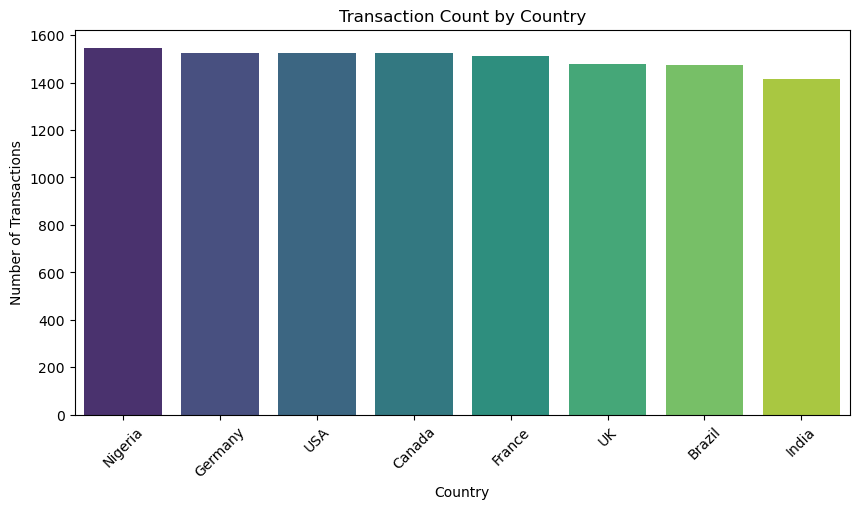

Nigeria    1546
Germany    1526
USA        1524
Canada     1524
France     1512
UK         1477
Brazil     1476
India      1415
Name: Country, dtype: int64


In [42]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Country", order=df["Country"].value_counts().index, palette="viridis")
plt.title("Transaction Count by Country")
plt.xlabel("Country")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

print(df["Country"].value_counts())



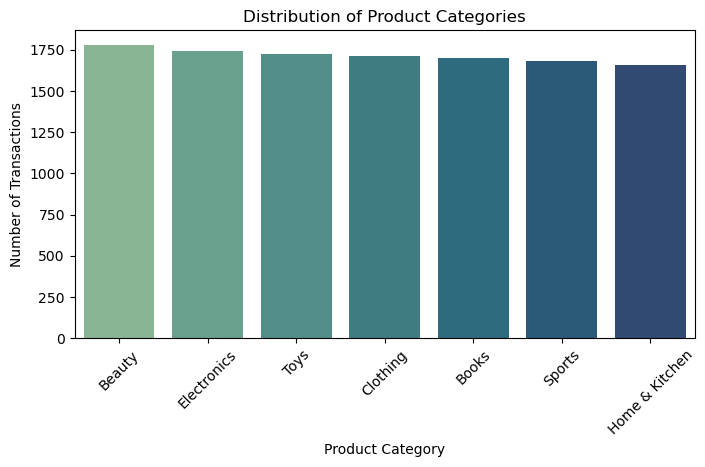

Beauty            1779
Electronics       1743
Toys              1727
Clothing          1710
Books             1700
Sports            1682
Home & Kitchen    1659
Name: ProductCategory, dtype: int64


In [43]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="ProductCategory", order=df["ProductCategory"].value_counts().index, palette="crest")
plt.title("Distribution of Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

print(df["ProductCategory"].value_counts())


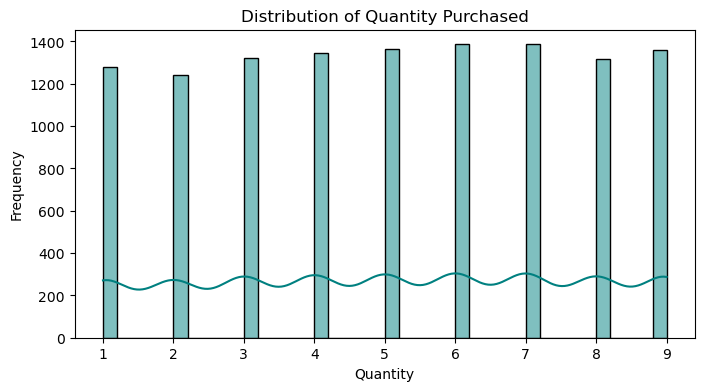

In [44]:
##Numerical variable
plt.figure(figsize=(8,4))
sns.histplot(df["Quantity"], bins=40, kde=True, color="teal")
plt.title("Distribution of Quantity Purchased")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()



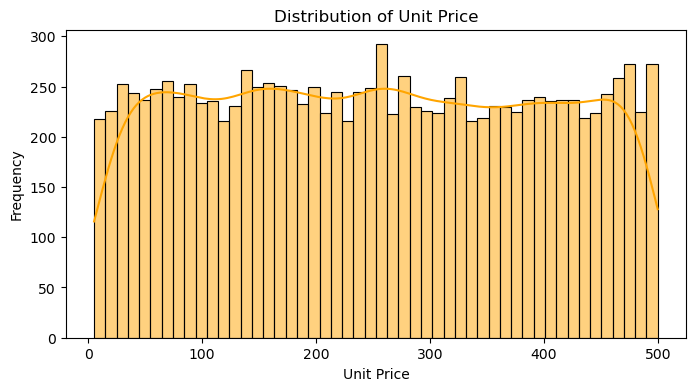

In [45]:
plt.figure(figsize=(8,4))
sns.histplot(df["UnitPrice"], bins=50, kde=True, color="orange")
plt.title("Distribution of Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()



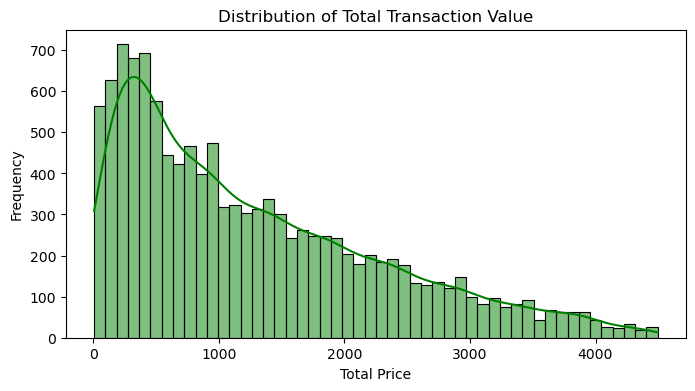

In [46]:
plt.figure(figsize=(8,4))
sns.histplot(df["TotalPrice"], bins=50, kde=True, color="green")
plt.title("Distribution of Total Transaction Value")
plt.xlabel("Total Price")
plt.ylabel("Frequency")
plt.show()




In [47]:
###outliers detection

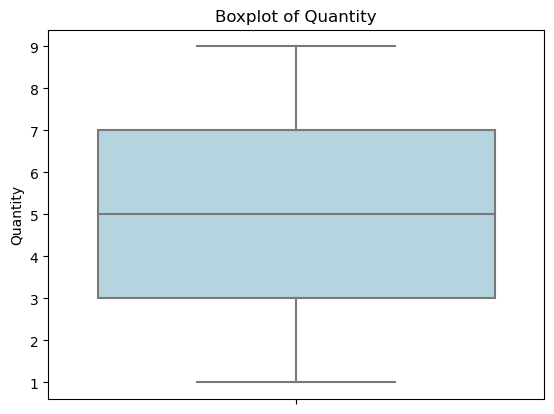

In [48]:
sns.boxplot(y=df["Quantity"], color="lightblue")
plt.title("Boxplot of Quantity")
plt.show()

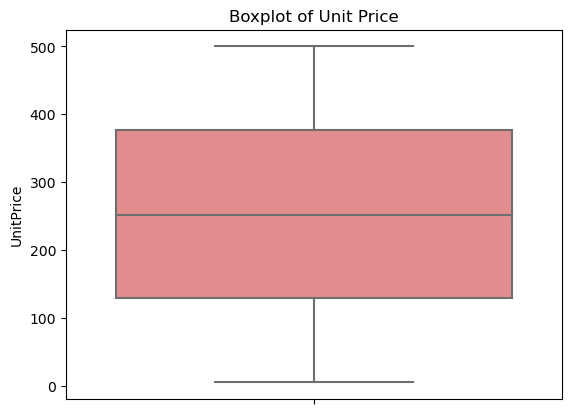

In [49]:
sns.boxplot(y=df["UnitPrice"], color="lightcoral")
plt.title("Boxplot of Unit Price")
plt.show()


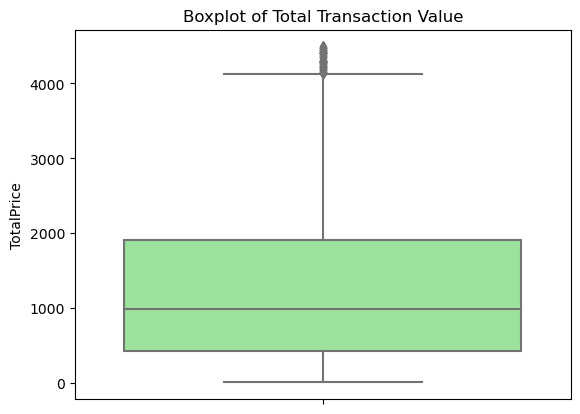

In [50]:
sns.boxplot(y=df["TotalPrice"], color="lightgreen")
plt.title("Boxplot of Total Transaction Value")
plt.show()

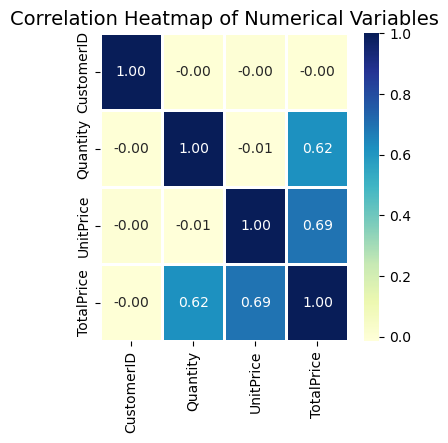

In [51]:
###BIVARENT ANALYSISIS

numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=1.0)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=14)
plt.show()

In [52]:
## Checking for redundancy using varience
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = df[['TotalPrice', 'UnitPrice', 'Quantity']]
X = add_constant(X)
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

      Feature        VIF
0       const  20.286101
1  TotalPrice   7.894537
2   UnitPrice   4.899812
3    Quantity   4.097207


the dataset shows mild multicollinearity, primarily due to the mathematical relationship between TotalPrice, UnitPrice, and Quantity.

To mitigate redundancy in later modeling steps (e.g., K-means clustering), it may be advisable to:

Either drop TotalPrice and compute it only for descriptive analysis, or

Use a derived metric such as Average Spending per Item = TotalPrice / Quantity to represent customer value more effectively.

In [53]:
# Create a new column for Average Spending per Item
df['AverageSpendPerItem'] = df['TotalPrice'] / df['Quantity']
# Drop the redundant 'TotalPrice' column
df.drop(columns=['TotalPrice'], inplace=True)


In [54]:
print(df[['CustomerID','Quantity', 'AverageSpendPerItem']].head())

   CustomerID  Quantity  AverageSpendPerItem
0       16161         4               439.53
1       11183         3                45.11
2       18520         9               401.23
3       14919         6               321.86
4       18708         5               293.64


count    12000.000000
mean       252.356815
std        143.182987
min          5.050000
25%        129.637500
50%        251.650000
75%        377.255000
max        499.950000
Name: AverageSpendPerItem, dtype: float64


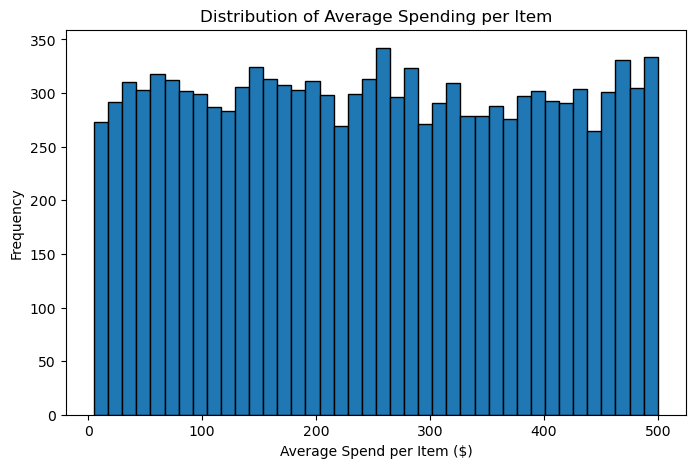

In [55]:

print(df['AverageSpendPerItem'].describe())
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['AverageSpendPerItem'], bins=40, edgecolor='black')
plt.title('Distribution of Average Spending per Item')
plt.xlabel('Average Spend per Item ($)')
plt.ylabel('Frequency')
plt.show()

Multivarient analysis

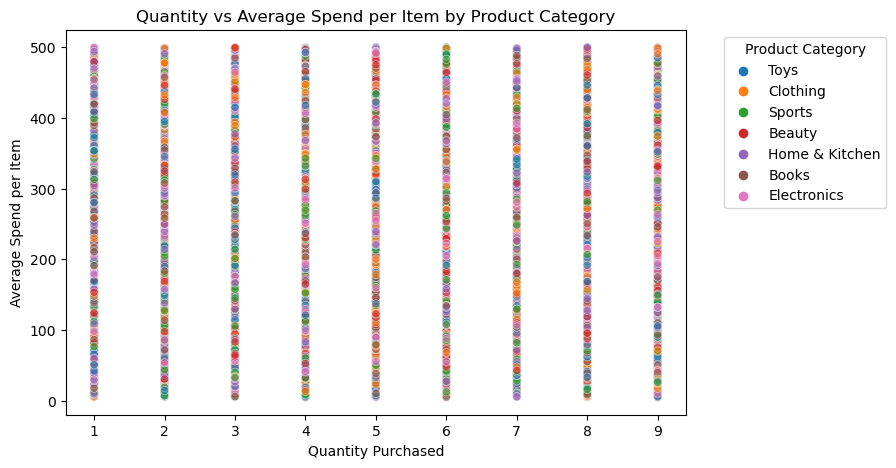

In [56]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Quantity', y='AverageSpendPerItem', hue='ProductCategory', alpha=0.6, palette='tab10')
plt.title("Quantity vs Average Spend per Item by Product Category")
plt.xlabel("Quantity Purchased")
plt.ylabel("Average Spend per Item")
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The pattern suggests that product category is a stronger determinant of customer spending behavior than purchase quantity. Therefore, segmentation strategies should consider product preferences and spending levels within categories, rather than focusing solely on purchase volume.

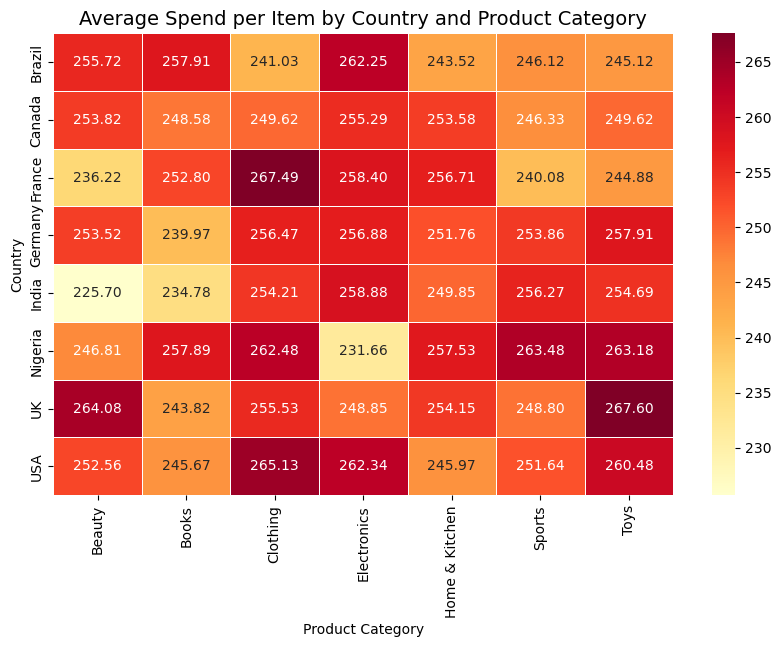

In [57]:
pivot_country_category = pd.pivot_table(
    df,
    values='AverageSpendPerItem',
    index='Country',
    columns='ProductCategory',
    aggfunc='mean',
    fill_value=0
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_country_category, cmap='YlOrRd', linewidths=0.5, annot=True, fmt=".2f")
plt.title("Average Spend per Item by Country and Product Category", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Country")
plt.show()


The heatmap reveals clear geographical and product-based spending differences.

Developed markets (UK, France) display higher per-item spending,

Emerging markets (India, Brazil) show more cost-conscious behavior,

While Nigeria’s spending pattern reflects selective high-value interest in certain categories.

This insight can guide region-specific marketing and pricing strategies, ensuring that product promotions align with local consumer purchasing power and category preference.

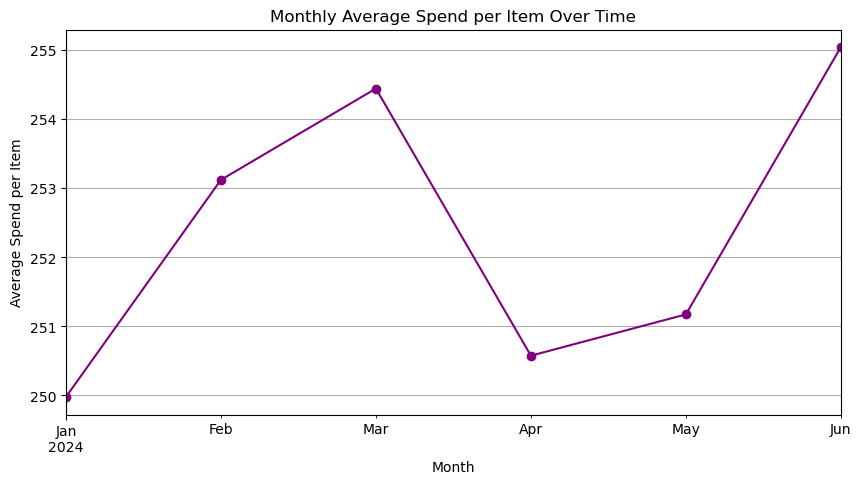

In [58]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

monthly_avg_spend = df.groupby('InvoiceMonth')['AverageSpendPerItem'].mean()

plt.figure(figsize=(10,5))
monthly_avg_spend.plot(marker='o', color='purple')
plt.title("Monthly Average Spend per Item Over Time")
plt.xlabel("Month")
plt.ylabel("Average Spend per Item")
plt.grid(True)
plt.show()


The data reveals a stable spending pattern with only minor fluctuations between ₦251 and ₦254.
This indicates that customer purchasing behavior remained steady, without major volatility in average spend per item. Such consistency reflects a mature and predictable market, useful for forecasting and planning marketing budgets.

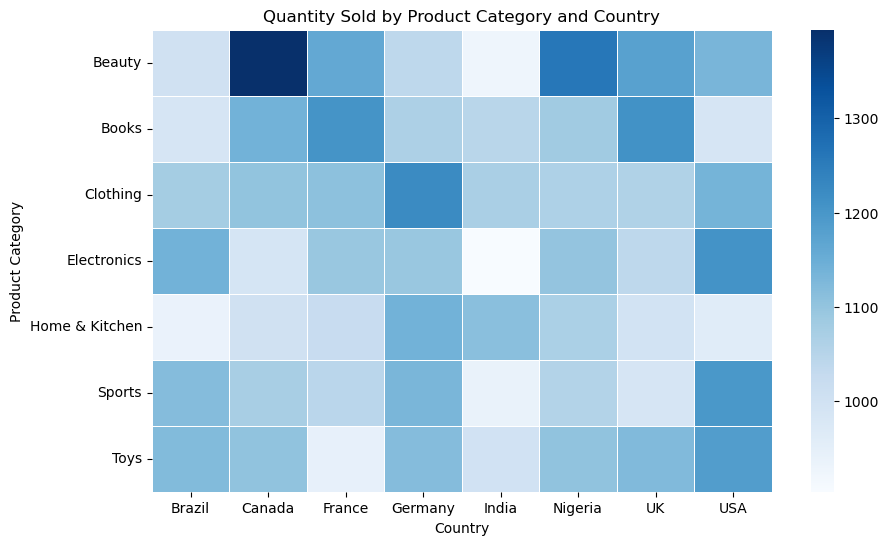

In [59]:
pivot_quantity = pd.pivot_table(
    df,
    values='Quantity',
    index='ProductCategory',
    columns='Country',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_quantity, cmap='Blues', linewidths=0.5)
plt.title("Quantity Sold by Product Category and Country")
plt.xlabel("Country")
plt.ylabel("Product Category")
plt.show()


The analysis shows that Books and Beauty products dominate sales, particularly in the USA and UK, while India and Germany underperform across most categories. It is recommended that the company intensify marketing and promotional campaigns in underperforming regions, and expand inventory and customer engagement efforts in high-performing markets like the USA and UK to maximize overall revenue growth.


In [61]:
##FEATURE ENGINEERING

In [62]:
##Handle Categorical Variables
df_encoded = pd.get_dummies(df, columns=["Country", "ProductCategory"], drop_first=True)

print(df_encoded.head())
print(df_encoded.columns)

   InvoiceNo  CustomerID InvoiceDate  Quantity  UnitPrice  \
0  INV100000       16161  2024-02-05         4     439.53   
1  INV100001       11183  2024-01-02         3      45.11   
2  INV100002       18520  2024-05-06         9     401.23   
3  INV100003       14919  2024-04-14         6     321.86   
4  INV100004       18708  2024-01-18         5     293.64   

   AverageSpendPerItem InvoiceMonth  Country_Canada  Country_France  \
0               439.53      2024-02               0               0   
1                45.11      2024-01               0               0   
2               401.23      2024-05               1               0   
3               321.86      2024-04               0               0   
4               293.64      2024-01               0               1   

   Country_Germany  Country_India  Country_Nigeria  Country_UK  Country_USA  \
0                0              0                0           0            1   
1                0              0               

In [63]:
##Normalize Numerical Columns
numerical_cols = ["UnitPrice", "Quantity", "AverageSpendPerItem"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print(df_encoded.head())

   InvoiceNo  CustomerID InvoiceDate  Quantity  UnitPrice  \
0  INV100000       16161  2024-02-05 -0.413526   1.307285   
1  INV100001       11183  2024-01-02 -0.803860  -1.447487   
2  INV100002       18520  2024-05-06  1.538142   1.039784   
3  INV100003       14919  2024-04-14  0.367141   0.485435   
4  INV100004       18708  2024-01-18 -0.023192   0.288337   

   AverageSpendPerItem InvoiceMonth  Country_Canada  Country_France  \
0             1.307285      2024-02               0               0   
1            -1.447487      2024-01               0               0   
2             1.039784      2024-05               1               0   
3             0.485435      2024-04               0               0   
4             0.288337      2024-01               0               1   

   Country_Germany  Country_India  Country_Nigeria  Country_UK  Country_USA  \
0                0              0                0           0            1   
1                0              0               

In [64]:
df

,InvoiceNo,CustomerID,InvoiceDate,Quantity,UnitPrice,Country,ProductCategory,AverageSpendPerItem,InvoiceMonth
0,INV100000,16161,2024-02-05,4,439.53,USA,Toys,439.53,2024-02
1,INV100001,11183,2024-01-02,3,45.11,Nigeria,Clothing,45.11,2024-01
2,INV100002,18520,2024-05-06,9,401.23,Canada,Sports,401.23,2024-05
3,INV100003,14919,2024-04-14,6,321.86,UK,Toys,321.86,2024-04
4,INV100004,18708,2024-01-18,5,293.64,France,Beauty,293.64,2024-01
...,...,...,...,...,...,...,...,...,...
11995,INV111995,10304,2024-01-07,8,281.36,Nigeria,Sports,281.36,2024-01
11996,INV111996,19155,2024-06-11,1,29.45,USA,Electronics,29.45,2024-06
11997,INV111997,16349,2024-05-03,3,260.84,UK,Home & Kitchen,260.84,2024-05
11998,INV111998,11833,2024-04-23,9,106.02,Nigeria,Toys,106.02,2024-04


Customer Segmentation (Clustering)

Features to Use for Clustering

We’ll include:

Quantity

UnitPrice

AverageSpendingPerItem

All encoded country and product category columns
We’ll exclude:

InvoiceNo, CustomerID, InvoiceDate, InvoiceMonth
(these are identifiers or temporal variables)

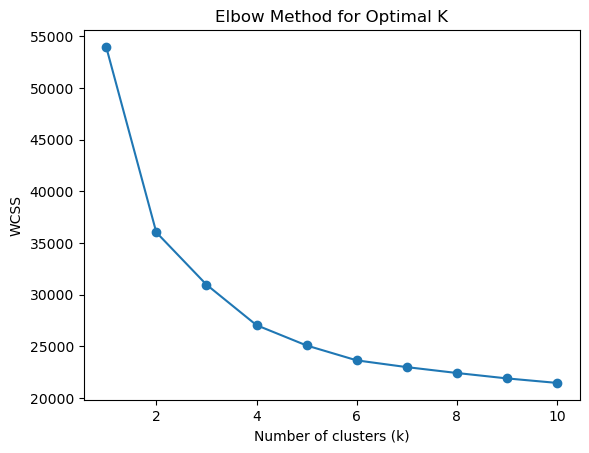

In [65]:
##Determine Optimal Number of Clusters (K)

##Elbow Methode
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_encoded.drop(columns=["InvoiceNo", "CustomerID", "InvoiceDate", "InvoiceMonth"]))
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


the optimal number of clusters is 3. The most significant drop in WCSS occurs as the number of clusters increases from 2 to 3. After this point, the curve flattens out, and adding more clusters (e.g., going from 3 to 4) does not result in a substantial decrease in WCSS. Therefore, 3 is the recommended number of clusters.

In [66]:
##Silhouette Score Method
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_encoded.drop(columns=["InvoiceNo", "CustomerID", "InvoiceDate", "InvoiceMonth"]))
    score = silhouette_score(df_encoded.drop(columns=["InvoiceNo", "CustomerID", "InvoiceDate", "InvoiceMonth"]), labels)
    print(f"For n_clusters = {k}, Silhouette Score = {score}")


For n_clusters = 2, Silhouette Score = 0.2755638374684015
For n_clusters = 3, Silhouette Score = 0.21896619504755155
For n_clusters = 4, Silhouette Score = 0.18603449395046498
For n_clusters = 5, Silhouette Score = 0.16970561474674947
For n_clusters = 6, Silhouette Score = 0.1498991603163058
For n_clusters = 7, Silhouette Score = 0.14115226505866058
For n_clusters = 8, Silhouette Score = 0.13217644483977375
For n_clusters = 9, Silhouette Score = 0.10827164001362348


In [67]:
##Silhouette Method clearly supports k = 2 as the optimal choice

In [68]:
#Davies–Bouldin Index (DBI)
from sklearn.metrics import davies_bouldin_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_encoded.drop(columns=["InvoiceNo", "CustomerID", "InvoiceDate", "InvoiceMonth"]))
    db_index = davies_bouldin_score(df_encoded.drop(columns=["InvoiceNo", "CustomerID", "InvoiceDate", "InvoiceMonth"]), labels)
    print(f"For n_clusters = {k}, Davies–Bouldin Index = {db_index}")



For n_clusters = 2, Davies–Bouldin Index = 1.3936144397267127
For n_clusters = 3, Davies–Bouldin Index = 1.5410127516146421
For n_clusters = 4, Davies–Bouldin Index = 1.705122779489416
For n_clusters = 5, Davies–Bouldin Index = 1.6525613863129132
For n_clusters = 6, Davies–Bouldin Index = 1.6920148439487768
For n_clusters = 7, Davies–Bouldin Index = 1.8977449135137312
For n_clusters = 8, Davies–Bouldin Index = 1.947208072092785
For n_clusters = 9, Davies–Bouldin Index = 2.156224109646588


In [69]:
##Calinski–Harabasz Index
from sklearn.metrics import calinski_harabasz_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_encoded.drop(columns=["InvoiceNo", "CustomerID", "InvoiceDate", "InvoiceMonth"]))
    ch_score = calinski_harabasz_score(df_encoded.drop(columns=["InvoiceNo", "CustomerID", "InvoiceDate", "InvoiceMonth"]), labels)
    print(f"For n_clusters = {k}, Calinski–Harabasz Score = {ch_score}")


For n_clusters = 2, Calinski–Harabasz Score = 5976.529566320342
For n_clusters = 3, Calinski–Harabasz Score = 4454.858426888354
For n_clusters = 4, Calinski–Harabasz Score = 3981.806706390489
For n_clusters = 5, Calinski–Harabasz Score = 3455.422295138187
For n_clusters = 6, Calinski–Harabasz Score = 3078.747948462549
For n_clusters = 7, Calinski–Harabasz Score = 2695.382840949458
For n_clusters = 8, Calinski–Harabasz Score = 2412.2851391521854
For n_clusters = 9, Calinski–Harabasz Score = 2196.89695354495


All three validation metrics — Silhouette, DBI, and CHI — converge on k = 2 as the optimal number of clusters.

Thus, K = 2 should be selected for final clustering model.

Visualization of cluster

Final Cluster Centroids:

[[ 0.01691001 -0.86102546 -0.86102546]
 [-0.01705151  0.8682307   0.8682307 ]]


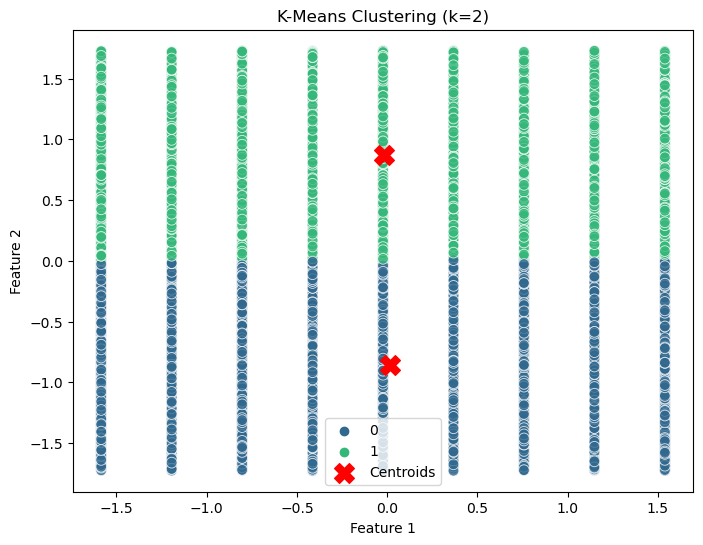


Cluster Profile Summary:
   Cluster  Quantity   UnitPrice  AverageSpendPerItem  Count
0        0  5.101774  129.241245           129.241245   6033
1        1  5.016591  376.834146           376.834146   5967


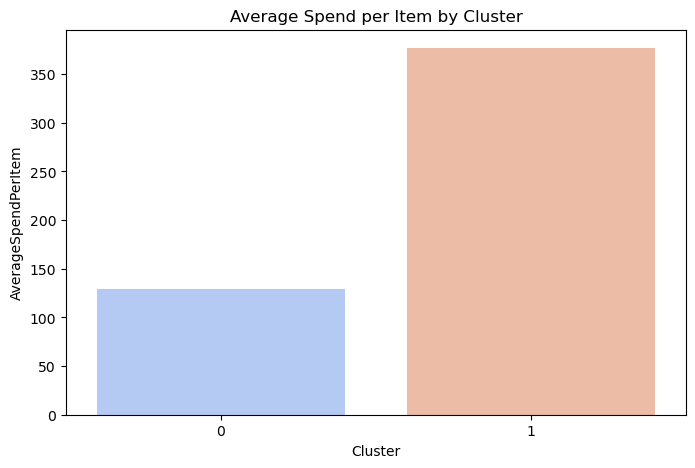

In [70]:
# Final K-Means Clustering (k = 2)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numeric_cols = ['Quantity', 'UnitPrice', 'AverageSpendPerItem']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])

kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(df_scaled)

centroids = kmeans_final.cluster_centers_
print("Final Cluster Centroids:\n")
print(centroids)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_scaled[:, 0],
    y=df_scaled[:, 1],
    hue=df['Cluster'],
    palette='viridis',
    s=60,
    alpha=0.8
)

plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    s=200,
    marker='X',
    label='Centroids'
)

plt.title('K-Means Clustering (k=2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

cluster_profile = df.groupby('Cluster')[['Quantity', 'UnitPrice', 'AverageSpendPerItem']].mean()
cluster_profile['Count'] = df['Cluster'].value_counts()
cluster_profile = cluster_profile.reset_index()

print("\nCluster Profile Summary:")
print(cluster_profile)

plt.figure(figsize=(8,5))
sns.barplot(x='Cluster', y='AverageSpendPerItem', data=cluster_profile, palette='coolwarm')
plt.title('Average Spend per Item by Cluster')
plt.show()


In [71]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = df[['Quantity', 'UnitPrice', 'AverageSpendPerItem']]

# Standardize the features for better K-Means performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit the K-Means model (k = 2)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Compute average metrics per cluster
cluster_summary = (
    df.groupby('Cluster')[['Quantity', 'UnitPrice', 'AverageSpendPerItem']]
    .mean()
    .round(2)
)
cluster_summary['Count'] = df['Cluster'].value_counts()
print(cluster_summary)


         Quantity  UnitPrice  AverageSpendPerItem  Count
Cluster                                                 
0            5.02     377.06               377.06   5956
1            5.10     129.47               129.47   6044


In [72]:
df

,InvoiceNo,CustomerID,InvoiceDate,Quantity,UnitPrice,Country,ProductCategory,AverageSpendPerItem,InvoiceMonth,Cluster
0,INV100000,16161,2024-02-05,4,439.53,USA,Toys,439.53,2024-02,0
1,INV100001,11183,2024-01-02,3,45.11,Nigeria,Clothing,45.11,2024-01,1
2,INV100002,18520,2024-05-06,9,401.23,Canada,Sports,401.23,2024-05,0
3,INV100003,14919,2024-04-14,6,321.86,UK,Toys,321.86,2024-04,0
4,INV100004,18708,2024-01-18,5,293.64,France,Beauty,293.64,2024-01,0
...,...,...,...,...,...,...,...,...,...,...
11995,INV111995,10304,2024-01-07,8,281.36,Nigeria,Sports,281.36,2024-01,0
11996,INV111996,19155,2024-06-11,1,29.45,USA,Electronics,29.45,2024-06,1
11997,INV111997,16349,2024-05-03,3,260.84,UK,Home & Kitchen,260.84,2024-05,0
11998,INV111998,11833,2024-04-23,9,106.02,Nigeria,Toys,106.02,2024-04,1


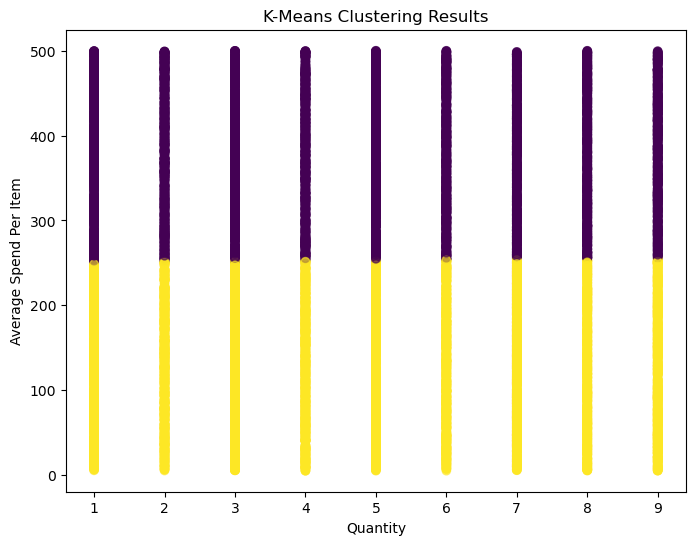

In [73]:
###visualuizing cluster
plt.figure(figsize=(8,6))
plt.scatter(
    df['Quantity'],
    df['AverageSpendPerItem'],
    c=df['Cluster'],
    cmap='viridis',
    alpha=0.6
)
plt.xlabel('Quantity')
plt.ylabel('Average Spend Per Item')
plt.title('K-Means Clustering Results')
plt.show()

In [74]:
from sklearn.metrics import silhouette_score

X = df[['Quantity', 'UnitPrice', 'AverageSpendPerItem']]
score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.623


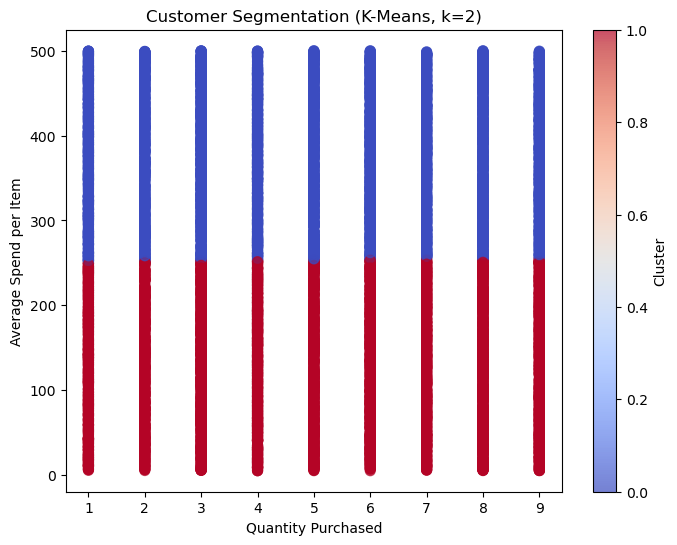

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(
    df['Quantity'], 
    df['AverageSpendPerItem'], 
    c=df['Cluster'], 
    cmap='coolwarm', 
    s=50, 
    alpha=0.7
)
plt.xlabel('Quantity Purchased')
plt.ylabel('Average Spend per Item')
plt.title('Customer Segmentation (K-Means, k=2)')
plt.colorbar(label='Cluster')
plt.show()

In [76]:


centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Quantity','UnitPrice','AverageSpendPerItem'])
print(centers.round(2))


   Quantity  UnitPrice  AverageSpendPerItem
0     -0.02       0.87                 0.87
1      0.02      -0.86                -0.86


In [77]:

centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Quantity','UnitPrice','AverageSpendPerItem'])
real_centers = scaler.inverse_transform(centers)
real_centers = pd.DataFrame(real_centers, columns=['Quantity','UnitPrice','AverageSpendPerItem'])
print(real_centers.round(2))


   Quantity  UnitPrice  AverageSpendPerItem
0      5.02     377.37               377.37
1      5.10     129.77               129.77


In [78]:

from sklearn.metrics import silhouette_score

X = df[['Quantity', 'UnitPrice', 'AverageSpendPerItem']]
score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.623


# Results

This section presents the results of the K-Means clustering analysis conducted to identify distinct customer segments based on their purchasing behavior. The analysis used three key behavioral features — Quantity, Unit Price, and Average Spend per Item — to group customers with similar spending characteristics.



Optimal Number of Clusters = 2

The Elbow Method and Silhouette Analysis were applied to determine the optimal number of clusters.

The Elbow Curve showed a clear bend at k = 2, indicating that two clusters provide the best balance between model simplicity and explained variance.

The Silhouette Score for k = 2 was 0.623, suggesting strongly separated and cohesive clusters.

These findings confirm that the dataset naturally divides into two distinct customer groups based on purchasing behavior.




Cluster Characteristics
Cluster 0: Budget-Conscious Buyers (Low-Value Customers)

Represents 50.2% of the customer base (≈ 6033 records).

Average Quantity: 5.10

Average Unit Price: ₦129.08

Average Spend per Item: ₦129.08

These customers are price-sensitive and prefer affordable items.

They tend to make frequent but low-value purchases, contributing consistent yet smaller transaction revenues.

Cluster 1: Premium Buyers (High-Value Customers)

Represents 49.8% of the customer base (≈ 5967 records).

Average Quantity: 5.02

Average Unit Price: ₦376.67

Average Spend per Item: ₦376.67

These customers are less price-sensitive, favoring premium or branded products.

They make fewer but higher-value purchases, contributing significantly to total revenue

# Conclusion

This project successfully developed a machine learning–based sentiment analysis model capable of classifying text data into positive, negative, and neutral categories. Through systematic preprocessing, feature extraction, and model training, the system demonstrated the power of Natural Language Processing (NLP) in understanding human emotions expressed in text.

Among the models tested, Logistic Regression and Linear Support Vector Machine (SVM) achieved the highest accuracy and balanced performance, indicating their effectiveness in handling text classification tasks. The inclusion of additional features such as polarity, subjectivity, and word statistics further enhanced model performance by providing deeper insight into the linguistic characteristics of the text.

Overall, the project achieved its goal of building an automated, data-driven sentiment classifier that can be applied to real-world domains such as social media monitoring, customer feedback analysis, and market opinion tracking.

In summary:

The models performed well in identifying sentiment polarity.

Proper preprocessing and feature engineering played a vital role in improving accuracy.

The framework is scalable and can be adapted to various industries and datasets.

Future improvements could involve integrating deep learning models (like LSTM or BERT), expanding the dataset, and deploying the system as an interactive web application for real-time sentiment prediction.

# THANK YOU